<a href="https://colab.research.google.com/github/legalnlp21/legalnlp/blob/main/demo/BERT/BERT_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
from IPython.display import clear_output 

#Ideias

ideia imagens: 

* uploadar pro github e pegar de lá, por enquanto usa o gdrive \
* [imagens - tutorial](http://jalammar.github.io/illustrated-bert/)
* Traduzir as imagens em inglês em port. (refazer todas para ficar em nossa autoria), c.c. só upar mesmo 

# Introdução


Com o amadurecimento das Redes Neurais Recorrentes (RNNs, em inglês), veio o surgimento e desenvolvimento de modelos de processamento de linguagem natural (PLN) mais complexos, capazes de compreender cada vez mais sentenças e seus contextos em um conjunto de textos. Como exemplo de uma aplicação dessas redes, temos o **BERT**, que é um modelo de aprendizado profundo bastante utilizado em diversas tarefas de processamento de linguagem natural.

BERT significa **B**idirectional **E**ncoder **R**epresentations for **T**ransformers e foi desenvolvido por pesquisadores do $\textit{Google AI Language}$ em 2018 e apresentado ao público em 2019, obtendo resultados espetaculares, conforme seu [artigo original](https://arxiv.org/pdf/1810.04805.pdf). Além disso, os [códigos do modelo](https://github.com/google-research/bert) também foram liberados pela equipe.

Sendo utilizado ainda como inspiração em diversas arquiteturas de PLN, formas de treinamento e modelos de linguagem natural, como XLNet, ERNIE2.0, RoBERTa, entre outros.

##O que é o BERT e como funciona

O que faz o BERT ser um modelo que se destaca é o fato dele utilizar um treinamento bidirecional do Transformer, que é um tipo de mecanismo de atenção muito efieciente que aprende as relações entre as componentes de um determinado texto.

Os Transformers funcionam com dois mecanismos: o $\textit{encoder}$ e o $\textit{decoder}$. Basicamente, o encoder funciona transformando o input recebido em contexto e o decoder funciona transformando esse contexto em algum outro objetivo, como por exemplo a tradução para uma outra língua.

Para mais informações sobre os Tranformers, leia o artigo original em que foi apresentado: [Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf).


Diferentemente dos modelos unidirecionais baseados em "contexto livre", como é o caso do $\textit{word2vec}$, gerando um $\textit{embedding}$ (representação do espaço das palavras no espaço real) igual para uma determinada palavra independentemente do seu contexto, o BERT, por ser um modelo bidirecional, consegue extrair o significado da palavra em cada contexto, por isso é chamado também de um "modelo contextual".

Para exemplificar o parágrafo acima, pense na palavra "banco". Nos modelos livres de contexto, essa palavra teria a mesma representação independentemente do seu contexto, embora banco representando uma agência bancária é diferente do banco de uma praça, por exemplo. Por sua vez, os modelos baseados em contexto, identificam cada palavra em seu contexto.  [**imagem abaixo sobre ”fui ao banco
hoje” e ”sentei-me no banco da praça”**](https://nlp.stanford.edu/seminar/details/jdevlin.pdf) 
 
Além disso, o BERT foi treinado utilizando uma enorme quantidade de dados não rotulados da Wikipedia (cerca de 2,5 bilhões de palavras) e em corpus de livros (cerca de 800 milhões de palavras).

Agora veremos brevemente a arquitetura desse modelo.


##Arquitetura

Quanto à arquitetura, o BERT possui dois tipos, de acordo com o artigo citado acima: o Base e o Large. As diferenças estão listadas abaixo:

**BERTBASE:** 

  * L = 12 \
  * H = 768 \
  * A = 12 \
  * Total de Parâmetros = 110 milhões

**BERTLARGE:**

  * L = 24 \
  * H = 1024 \
  * A = 16 \
  * Total de Parâmetros = 340 milhões

\
**Onde**:\
    L = Número de camadas (Blocos Transformer)\
    H = Quantidade de unidades na rede neural\
    A = Cabeças de auto-atenção

[imagem](http://jalammar.github.io/images/bert-base-bert-large-encoders.png)

### Entrada do Modelo

A entrada do modelo pode ser composta por uma sentença ou por um par de sentenças, com tamanho máximo suportado pelo modelo de 512 tokens. O BERT utiliza a tokenização WordPiece.

O primeiro token de entrada é sempre marcado como [CLS], que é um token especial de classificação. Quando duas frases entram no modelo, elas podem ser diferenciadas por meio do token [SEP].

[imagem1](http://jalammar.github.io/images/bert-output-vector.png) e [imagem2](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/09/bert_emnedding.png)

Para um dado token de entrada, sua forma é dada por um embedding da soma de 3 outros tokens, como visto na figura acima. São eles:

* **Position Embeddings**: O modelo aprende e utiliza embeddings de posição para expressar a posição/ordem das palavras na sentença. 

* **Segment Embeddings**: O BERT recebe pares de sentenças e utiliza embeddings para o modelo aprender e conseguir distingui-las.  

* **Token Embeddings**: São embeddings específicos, aprendidos através do vocabulário do WordPiece.



### Saída do Modelo

Já a saída do modelo consiste em um vetor de tamanho $\textit{hidden_size}$, que no caso do BERT BASE é 768 para cada token de entrada, que também pode ser visto como uma representação vetorial real daquele determinado token.

## Pré Treinamento

O BERT possui 2 estratégias de pré treinamento: Masked Language Model (MLM) e Next Sentence Prediction (NSP).

### **Masked LM (MLM)**

Nessa abordagem, são mascarados ([MASK]) aleatoriamente $15\%$ dos tokens de entrada e então feita a predição apenas desses tokens mascarados por meio de uma função $\textit{softmax}$. 

Porém, surge um problema com essa abordagem: É criado um desbalanceamento entre a fase de pré-treinamento e a fase de ajuste-fino (fine-tuning), pois o token [MASK] não aparece na última. Para solucionar isso, é realizado, dentro dos $15\%$ dos tokens aleatoriamente selecionados:

\
* $80\%$ das vezes é sustituído com [MASK]:

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao [MASK]

\
* $10\%$ das vezes é susbtituído com alguma palavra aleatória:

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao chovendo

\
* $10\%$ das vezes é mantido a mesma palavra

$\quad\quad\quad$ Fui ao banco $\rightarrow$ Fui ao banco

[Imagem](https://lh4.googleusercontent.com/hyY2qeyjQrpO78dZHRVkEQEinPlwhRwImKyOECM2BbzlfaL1zxYzMDzaywb2Qt7k3eGh06SwoVx-e18Twn_vmh8-PoaqZmefSHG6h0FHS0aIEVdLU5mdaUttDSeyu3_ElK7QDszs)

In [ ]:
# example
# Input Sequence  : The man went to [MASK] store with [MASK] dog
# Target Sequence :                  the                his

### **Next Sentence Prediction (NSP)**

Essa estratégia, por sua vez, se caracteriza por focar nas relações entre as sentenças, pré-treinando assim para uma tarefa de predição de próximas sentenças em que são possíveis apenas 2 resultados, "IsNext", caso a sentença B seja a próxima sentença de A ou "NotNext" caso contrário.

Para essa tarefa, os dados de treino consistem de $50\%$ dos dados rotulados como "IsNext" e os outros $50\%$ como "NotNext", e é aplicada em conjunto com a estratégia de Masked ML explicada acima.

Exemplos:

Input = [CLS] the man went to [MASK] store [SEP]
he bought a gallon [MASK] milk [SEP]

Label = IsNext

Input = [CLS] the man [MASK] to the store [SEP]
penguin [MASK] are flight ##less birds [SEP]

Label = NotNext


# Utilizando o BERT: **Fine-Tuning** 

[imagem](https://lh5.googleusercontent.com/IS9tIpfQmDSZlkHFz08avqAMZ1OZcw9hYjAkdU8Ee_5uXxMOWoZaPE0vpkeK_Yc3_N8er4iCDpPP2DMVxz4keGdPnRqUZVjCyPyptDQpt5_ft4imdtDe2ooecb4KFU9KI0R6rhuk)

Classificação de Pares de Sentenças — É semelhante ao processo de Next Sentence Prediction (NSP), adicionando uma camada de classificação no topo do output referente ao token [CLS] retornando uma distribuição de probabilidades calculadas por uma função $\textit{softmax}$. [imagem](https://yashuseth.files.wordpress.com/2019/06/fig2-1.png?w=443&h=398)

Classificação de Sentenças Únicas — Semelhante ao processo acima. [imagem](https://yashuseth.files.wordpress.com/2019/06/fig1-1.png?w=460&h=400)

Single Sentence Tagging Task — Nessa tarefa são preditas tags para um determinado token. Como exemplo, para uma tarefa de classificar partes do discurso em Pronome, Verbo, Adjetivo, etc. [imagem](https://www.deepcrawl.com/wp-content/uploads/2019/12/Screen-Shot-2019-12-16-at-11.20.07.png)

Question Answering Tasks — Essa é uma tarefa de predição. O modelo recebe uma pergunta, que atua como a primeira sentença e um parágrafo contendo o contexto relacionado a pergunta, atuando como a segunda sentença. É feito então o produto escalar da forma final do embedding de cada token com um vetor de pesos, sendo aplicado em uma função de ativação para retornar uma distribuição de probabilidade. A palavra que tiver a maior probabilidade é escolhida. Como exemplificado na figura abaixo:

[linka q&a BERT](https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/) \
[imagem](https://yashuseth.files.wordpress.com/2019/06/fig6.png?w=389&h=297) \
[imagem2](https://yashuseth.files.wordpress.com/2019/06/fig3.png?w=452&h=380) e/ou [imagem3](http://www.mccormickml.com/assets/BERT/SQuAD/input_formatting.png) \
[imagem4](http://www.mccormickml.com/assets/BERT/SQuAD/start_token_classification.png)

#Hands On

Usar esse tutorial tbm para o tutorial (daqui pra baixo) [Tutorial - BERT](https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/)

## Loading Data

Instalando as bibliotecas necessárias:

In [ ]:
!pip install unidecode
!pip install ftfy
!pip install transformers==4.2.2
!pip install pyreadr
!pip install git+https://github.com/legalnlp21/legalnlp
clear_output()

Aqui vamos importar algumas bibliotecas que serão muito úteis para frente!

In [ ]:
# manipulação numérica e de dataframes
import numpy as np
import pandas as pd

# gráficos e ajustes visuais
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from tqdm import tqdm

# pré-processamento de textos e lidar com variáveis categóricas, modelos e métricas 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# tratamento de textos 
import unidecode
import re
import ftfy
from legalnlp.get_premodel import *
from legalnlp.clean_functions import *

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/legalnlp21/legalnlp/main/demo/data_base.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)

## Breve exploração na base de dados

Antes de aplicar os modelos, vale a pena dar uma explorada nos dados que estamos trabalhando. Primeiramente, qual o tamanho desse conjunto de dados?

In [ ]:
print("Quantidade de linhas: ", data.shape[0])
print("Quantidade de colunas: ", data.shape[1])

Quantidade de linhas:  6449
Quantidade de colunas:  2


Vamos visualizar uma pequena amostra desses dados:

In [ ]:
# amostra de tamanho 5
data.sample(5)

,text,label
3404,Tipo do Movimento:Início da Execução,H:Ativo
4158,Petição Juntada Nº Protocolo: WPOA.16.80000696...,H:Ativo
3707,Remetida a Carta Precatória ao Cartório de Ori...,H:Arquivado
4563,Conclusos para Sentença,H:Ativo
1642,Remetidos os Autos para o Tribunal de Justiça/...,H:Ativo


Vamos verificar se tem algum valor faltante nas colunas:

In [ ]:
# valores nas colunas faltante
print(f'Total de: {data["text"].isna().sum()} textos vazios')
print(f'Total de: {data["label"].isna().sum()} classes vazias')

Total de: 0 textos vazios
Total de: 0 classes vazias


Felizmente, não temos nenhum valor faltante nas colunas. 

E aqui um gráfico de como os rótulos da coluna "label" estão distribuídos:

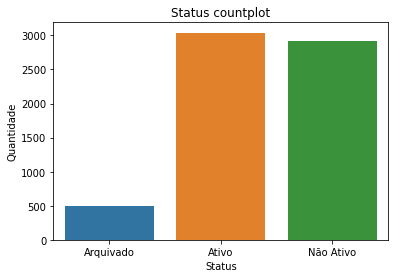

In [ ]:
# countplot das labels
sns.countplot(x = data['label'])

plt.xticks(np.arange(0, 3, step = 1), ['Arquivado', 'Ativo', 'Não Ativo'])
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Status countplot')

plt.show()

E em frequências relativas:

In [ ]:
# Frequência das labels
freq = pd.DataFrame(data['label'].value_counts()/len(data))
freq

,label
H:Arquivado,0.471391
H:Ativo,0.452318
H:Suspenso,0.076291


##Limpando os textos

Aqui vamos aplicar a função abaixo (clean_bert), que recebe um texto como argumento e realiza a limpeza desse texto, cuidando de Unicodes ruins (caracteres estranhos) por meio do atributo fix_text da biblioteca [ftfy: fixes text for you](https://ftfy.readthedocs.io/en/latest/) e fazendo substituições de determinados caracteres para outros específicos.

Com a função clean_bert, aplicamos na coluna de textos do nosso conjunto de dados:

In [ ]:
data['text'] = data['text'].apply(lambda x:clean_bert(x))
data

,text,label
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado
...,...,...
6444,Remetidos os Autos para o Arquivo Geral – Devo...,H:Suspenso
6445,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado
6446,Petição Juntada Nº Protocolo: WSCB.19.70085805...,H:Ativo
6447,Remetidos os Autos para o Tribunal de Justiça/...,H:Ativo


Após a limpeza dos dados, vamos dar uma olhada em alguns exemplos:

In [ ]:
str(data.loc[3, 'text'])

'Petição Juntada Juntada a petição diversa - Tipo: Petição Intermediária em Procedimento Comum Cível - Número: 80031 - Protocolo: FGRU19000140154 - Complemento: autor, expedição de ofício.'

In [ ]:
str(data.loc[1278, 'text'])

'Certidão de Cartório Expedida Certifico e dou fé que foram interpostos 2 (dois) incidentes digitais para expedição de ofício requisitório sendo 1(um) referente a ORPV e 1 (um) referente a Precatório, os quais encontram-se aguardando análise. Nada Mais.'

In [ ]:
#data.to_csv("clean_date_base.csv",index=False)

#Applying the Label Encoder to handle categorical labels

Agora, com os textos limpos, vamos ver brevemente como lidar com as variáveis categóricas através do LabelEnconder: 

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['label'])
data['encoded'] = encoder.transform(data['label'])
data

,text,label,encoded
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso,2
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado,0
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso,2
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo,1
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado,0
...,...,...,...
6444,Remetidos os Autos para o Arquivo Geral – Devo...,H:Suspenso,2
6445,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado,0
6446,Petição Juntada Nº Protocolo: WSCB.19.70085805...,H:Ativo,1
6447,Remetidos os Autos para o Tribunal de Justiça/...,H:Ativo,1


A coluna 'encoded' representa a forma que os elementos da coluna 'label' foram transformados em variáveis numéricas, como temos 3 classes, cada uma recebeu um valor 0, 1 ou 2, como podemos ver abaixo:

In [ ]:
data.loc[[0, 1, 5], ['label', 'encoded']]

,label,encoded
0,H:Suspenso,2
1,H:Arquivado,0
5,H:Arquivado,0


#Aplicando o tokenizador

## Fazer texto aqui 

In [ ]:
import pickle
import random
import os
import copy 

import torch
import torch.nn as nn
import torch.utils.data as tdata
import torch.optim as optim
import transformers
from transformers import AutoModel, AutoTokenizer, AutoConfig
from transformers import BertForPreTraining, BertModel, BertTokenizer, BertForMaskedLM, BertForNextSentencePrediction, BertForQuestionAnswering

torch.cuda.is_available()

True

In [ ]:
# verificando se tem cuda disponível
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device('cuda:0')

## Loading Tokenizer and PreTrained Model

link2 interessante: [Bert - Transformers Documentation](https://huggingface.co/transformers/)


Aqui vamos criar duas variáveis que servirão como o tokenizador e o modelo BERT que foi pré-treinado. 

In [ ]:
# Downloading BERTikal
get_premodel('bert')

In [ ]:
model = '/content/BERTikal'
tokenizer= '/content/BERTikal/vocab.txt'
clear_output()

Aqui as configurações do modelo:

In [ ]:
# configuração do BERT
bert_model.config

NameError: ignored

# Using tokenizer

Nessa seção veremos como o tokenizador importado acima funciona com alguns exemplos, relacionando com a teoria apresentada no começo desse tutorial.

explicar tokenizador (imagem) e explicações [por esse link](https://nlpiation.medium.com/how-to-use-huggingfaces-transformers-pre-trained-tokenizers-e029e8d6d1fa)

Esse também: [visual guide to BERT](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/)

In [ ]:
# Exemplo 1
print(bert_tokenizer.tokenize('Example to test the text tokenizer'))
print()

# Exemplo 2
print(bert_tokenizer.encode('Another example with the tokenizer'))
print(bert_tokenizer.decode(bert_tokenizer.encode('Another example with the tokenizer')))
print()

# Exemplo 3
tokens = bert_tokenizer.tokenize("This is a sample text to test the tokenizer.")
print(bert_tokenizer.convert_tokens_to_ids(tokens))
print(bert_tokenizer.decode(bert_tokenizer.convert_tokens_to_ids(tokens)))

['Ex', '##amp', '##le', 'to', 'test', 'the', 'tex', '##t', 'to', '##ken', '##ize', '##r']

[101, 7181, 5238, 11367, 3066, 10125, 1621, 374, 8110, 15134, 22282, 102]
[CLS] Another example with the tokenizer [SEP]

[16989, 847, 123, 5748, 3066, 4509, 22286, 374, 15606, 1621, 374, 8110, 15134, 22282, 119]
This is a sample text to test the tokenizer.


In [ ]:
bert_tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

In [ ]:
# Tamaho do vocabulário
print("Vocab size: ", bert_tokenizer.vocab_size)

Vocab size:  29794


In [ ]:
bert = data['text'].apply(lambda x: bert_tokenizer.encode(x, add_special_tokens=True,max_length=512, truncation = True))
print('Max sentence length: ', max([len(sen) for sen in bert]))

Max sentence length:  512


# Applying tensor

## Escrever texto aqui 

In [ ]:
# Fazendo a padronização dos textos
wrapper = textwrap.TextWrapper()
data_text = list(data['text'])

for text in range(len(data_text[:4])):
  print(f'{wrapper.fill(data_text[text])}')
  print()

Ofício Requisitório - Comunicação - Protocolo Eletrônico - DEPRE

Suspensão do Prazo Prazo referente ao usuário foi alterado para
15/04/2019 devido à alteração da tabela de feriados

Certidão de Publicação Expedida Relação : 0274/2019 Data da
Disponibilização : 28/03/2019 Data da Publicação : 29/03/2019 Número
do Diário : 2777/2019 Página : 3072/3073

Embargos de Declaração Juntados N Protocolo : WFPA.19.70129354-1 Tipo
da Petição : Embargos de Declaração Data : 18/03/2019 14 : 13



In [ ]:
# Aplicando o bert_tokenizer em nosso dataset com um comprimento máximo de 512 tokens
encoded_inputs = bert_tokenizer(data_text, padding=True, truncation=True, max_length=512, return_tensors="pt")


#Agora temos nossos encoded_input em um dicionário com 3 chaves
encoded_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
#Visualiando o primeiro texto após a aplicação do tokenizador
print(encoded_inputs['input_ids'][0])

print()

# Mostrando o mesmo texto decodificado 
print(wrapper.fill(bert_tokenizer.decode(encoded_inputs['input_ids'][0])))

tensor([  101,  5310,   826,   482,  5680, 20942,   118, 11266,   118,  1072,
        11885,   787,  9474, 19961,   118, 10836,  8519, 22309,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
# Enviando os tensores para para a GPU
input_ids = encoded_inputs['input_ids'].to(device)

In [ ]:
# Criando o nosso vetor de features 
features = []

# Aplicando o modelo pré-treinado em cada frase e adicionando-o ao nosso vetor

for i in tqdm(range(len(data_text))):

    with torch.no_grad():
    
      last_hidden_states = bert_model(input_ids[i:(i+1)])[1].cpu().numpy().reshape(-1).tolist()

    features.append(last_hidden_states)


100%|██████████| 6449/6449 [04:44<00:00, 22.69it/s]


In [ ]:
# Criando um numpy array com as features extraidas
features = np.array(features)
features[:2]

array([[ 0.21300419, -0.06187769,  0.19168803, ...,  0.13242958,
         0.03815605, -0.37764931],
       [ 0.1695669 , -0.09109744, -0.24267955, ...,  0.08524882,
        -0.07674872, -0.35844153]])

In [ ]:
# Printando o numero de linhas e de colunas das features extraídas
print('Número de linhas: ', features.shape[0])
print('Número de colunas: ', features.shape[1])

Número de linhas:  6449
Número de colunas:  768


#Splitting the data

In [ ]:
data.head(5)

,text,label,encoded
0,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado,0
1,Suspensão do Prazo Prazo referente ao usuário ...,H:Ativo,1
2,Certidão de Publicação Expedida Relação : 0274...,H:Ativo,1
3,Embargos de Declaração Juntados N Protocolo : ...,H:Ativo,1
4,Certidão de Trânsito em Julgado com Baixa Expe...,H:Arquivado,0


In [ ]:
df_features = pd.DataFrame(features)

In [ ]:
features_label = pd.concat([df_features, data['encoded']], axis = 1)
features_label.shape

(6449, 769)

In [ ]:
features_label.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,encoded
0,0.213004,-0.061878,0.191688,0.111915,-0.150205,0.142891,0.973058,0.027699,0.022648,0.045383,-0.769608,-0.136181,-0.074700,-0.173915,-0.061021,-0.073128,-0.184765,0.122179,0.725559,0.880777,0.436253,0.338922,-0.102538,0.232858,0.138832,-0.012877,-0.045564,-0.126367,0.046487,-0.020299,-0.114852,-0.918361,-0.800683,0.150831,0.050373,-0.003345,-0.082131,0.015633,0.622598,-0.050648,...,0.029844,0.399764,-0.068559,0.090608,0.120375,0.013159,0.080176,0.151421,-0.092320,-0.067133,-0.189361,-0.916928,0.120556,0.101625,0.147081,-0.023915,0.248588,0.100448,-0.029027,0.478418,0.119008,0.128067,-0.023195,-0.043348,-0.221368,-0.043133,-0.039578,-0.678569,-0.087416,-0.257764,0.136397,0.098482,0.293969,0.128455,0.015670,0.123465,0.132430,0.038156,-0.377649,0
1,0.169567,-0.091097,-0.242680,0.178787,-0.177656,0.130401,0.976277,0.017872,0.148432,-0.196599,-0.379983,-0.008223,-0.034299,0.075696,0.042622,0.120519,-0.131866,0.140182,0.340545,0.860612,0.058308,-0.007628,0.183560,-0.023412,0.013758,0.005112,-0.201926,-0.146302,0.049567,0.081381,-0.028101,-0.930461,-0.797499,0.140564,0.158708,0.074197,-0.164123,-0.273752,0.636333,0.144160,...,0.009798,0.072730,-0.175166,-0.211211,-0.015053,-0.008481,0.051850,0.031284,-0.169021,-0.155846,0.018819,-0.804809,0.284295,0.068161,0.074636,-0.046744,-0.105928,0.136875,-0.127856,0.458688,-0.192503,-0.109917,0.038795,0.084205,0.076356,-0.129145,-0.283106,-0.819139,0.101540,0.067064,-0.051039,0.071160,0.179313,0.136456,-0.134095,-0.162085,0.085249,-0.076749,-0.358442,1
2,0.039870,0.008240,0.083041,0.032599,-0.323541,-0.001493,0.990886,0.155582,0.087844,-0.031762,-0.740631,0.060286,-0.301203,-0.087483,-0.013298,0.135316,0.020440,-0.238643,0.575538,0.967516,0.455953,0.154738,-0.125155,0.097503,0.112544,0.033023,-0.199780,-0.166796,0.158993,-0.288010,-0.024230,-0.945562,-0.912275,0.133160,0.027080,0.018360,0.058290,0.072557,0.657168,-0.007925,...,0.041852,0.342567,-0.115420,0.079711,-0.075792,0.241022,-0.009545,0.296595,-0.068572,0.017020,0.220825,-0.628192,0.094745,0.195812,0.171997,-0.160022,-0.061801,-0.016905,0.030981,0.809527,0.173910,0.099548,-0.019678,-0.040858,-0.510020,-0.025346,-0.134380,-0.902354,-0.059552,-0.189241,0.173354,0.077324,0.013962,-0.045378,0.130027,0.194835,0.146695,0.154580,-0.119303,1
3,0.038922,-0.034344,0.069993,0.230154,-0.042444,0.136905,0.988360,0.123817,0.131343,-0.058486,-0.925525,0.102146,-0.085835,-0.015118,0.101944,-0.104812,-0.029333,-0.163608,0.856248,0.765367,0.255869,0.011600,-0.044551,0.134143,-0.075192,0.109485,-0.094910,-0.226391,0.025117,-0.090953,-0.010713,-0.971242,-0.970499,0.256041,0.199651,-0.015521,-0.201048,0.037832,0.936478,0.153926,...,0.055100,0.279893,-0.204817,0.043072,0.027144,-0.293820,0.005536,0.084013,-0.199508,0.094772,0.266638,-0.862093,0.161535,0.023770,-0.045388,-0.113089,-0.242305,0.110768,0.249349,0.174210,0.083279,-0.144858,0.227666,-0.177185,-0.673787,0.103994,-0.143771,-0.959469,0.031269,-0.281008,-0.111036,0.322989,-0.335032,0.134222,-0.184369,0.210217,0.307293,0.077462,-0.306194,1
4,0.149430,0.346361,0.093802,0.115540,-0.176476,0.134482,0.977815,0.052598,0.349862,-0.339473,-0.881110,0.241292,0.229646,-0.054467,-0.009449,-0.053881,0.019513,-0.067502,0.783675,0.907286,0.238376,0.068927,-0.304348,0.310043,0.083573,0.328708,-0.040154,0.062402,-0.000453,-0.125877,-0.028455,-0.904128,-0.892711,-0.084607,-0.053562,-0.167021,-0.026511,0.087082,0.826747,0.402070,...,-0.191426,0.298292,0.064483,0.188030,-0.034069,0.043791,0.101314,0.008808,-0.190740,-0.006509,0.032558,-0.896630,0.266165,0.016647,0.151480,0.071296,0.231312,-0.101219,-0.117950,0.311274,0.313696,0.240333,-0.217274,-0.217096,-0.129524,-0.097827,-0.102737,-0.822283,0.127508,0.084225,0.171558,0.076402,0.032599,-0.00397

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_label.drop(columns = ['encoded']), features_label['encoded'], random_state = 42,test_size = 0.3)

In [ ]:
# Tamanhos dos x e y de treino e teste
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4514, 768)
(1935, 768)
(4514,)
(1935,)


#Classificação

## O Modelo de Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [ ]:
# Instanciando o modelo de Regressão Logística em que será feito o cross-validaton em seguida
log_reg = LogisticRegression(max_iter = 10000,
                             random_state = 42, 
                             solver = 'liblinear')

log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Definindo o espaço de busca de parâmetros
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = np.logspace(-3, 3, 100)

rscv = RandomizedSearchCV(log_reg, space, cv = 3, n_jobs=-1,verbose = 1, random_state = 42, n_iter = 30)

# Fazendo o cross-validation
result = rscv.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 54.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 64.1min finished


In [ ]:
# Melhores hiperparâmetros
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8486908296222992
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 5.72236765935022}


In [ ]:
log_reg = LogisticRegression(penalty = result.best_params_['penalty'],
                             C = result.best_params_['C'],
                             solver = result.best_params_['solver'],
                             random_state = 42)

# Treinando os modelos com os melhores hiperparâmetros
log_reg.fit(x_train, y_train)

LogisticRegression(C=5.72236765935022, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# y hat - predicted values for y
y_pred = log_reg.predict(x_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [ ]:
# Prevendo as probabilidades 
log_reg.predict_proba(x_test)[:5]

array([[4.80476923e-01, 5.00272235e-01, 1.92508413e-02],
       [9.95982205e-01, 2.99263254e-03, 1.02516271e-03],
       [9.60277984e-01, 2.75812086e-04, 3.94462042e-02],
       [1.92732991e-02, 9.79271591e-01, 1.45510964e-03],
       [4.36552010e-01, 5.56720154e-01, 6.72783634e-03]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8459948320413436

In [ ]:
y_pred_train = log_reg.predict(x_train)
y_pred_train[:5]

array([0, 1, 0, 0, 1])

In [ ]:
# Acurácia
accuracy_score(y_train, y_pred_train)

0.8757199822773594

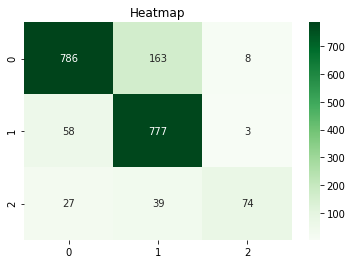

In [ ]:
# Plotando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       957
           1       0.79      0.93      0.86       838
           2       0.87      0.53      0.66       140

    accuracy                           0.85      1935
   macro avg       0.86      0.76      0.79      1935
weighted avg       0.85      0.85      0.84      1935



## O Modelo de Boosting: CatBoost

link mto bom: [CatBoost models - Tutorial](https://github.com/catboost/tutorials)

link para classificação: [Classification Tutorial - CatBoost](https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb)

link interessante (explicação tutorial): [Training, Validating and Testing the Model](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

Nesa seção vamos aplicar um modelo chamado CatBoost (Categorical Boosting), que é um modelo de aprendizado por comitê (ensemble learning).

In [ ]:
!pip install catboost
clear_output()

In [ ]:
# Importando o CatBoostClassifier 
from catboost import CatBoostClassifier

In [ ]:
# creating validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train, random_state = 42)

In [ ]:
tunned_model = CatBoostClassifier(
    loss_function = 'MultiClass',
    thread_count = -1, 
    random_seed=42,
    iterations=3000,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    leaf_estimation_method='Newton'
)

tunned_model.fit(
    x_train, y_train,
    verbose=500,
    eval_set=(x_val, y_val),
    early_stopping_rounds = 100
)

0:	learn: 1.0680192	test: 1.0694044	best: 1.0694044 (0)	total: 680ms	remaining: 34m
500:	learn: 0.3061264	test: 0.3588947	best: 0.3588947 (500)	total: 3m 34s	remaining: 17m 48s
1000:	learn: 0.2489342	test: 0.3442895	best: 0.3442134 (996)	total: 7m 5s	remaining: 14m 9s
1500:	learn: 0.2170818	test: 0.3385425	best: 0.3383697 (1481)	total: 10m 36s	remaining: 10m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3366706942
bestIteration = 1671

Shrink model to first 1672 iterations.


In [ ]:
y_cat_pred = tunned_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_cat_pred)

0.8444444444444444

In [ ]:
tunned_model.predict_proba(x_test)[:5]

array([[6.05021998e-01, 3.89404305e-01, 5.57369763e-03],
       [9.98329181e-01, 6.31441480e-04, 1.03937735e-03],
       [9.73823517e-01, 2.41106403e-03, 2.37654188e-02],
       [1.87658719e-02, 9.79953470e-01, 1.28065782e-03],
       [1.48220163e-01, 8.17524628e-01, 3.42552092e-02]])

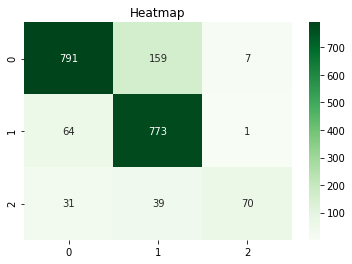

In [ ]:
cm = confusion_matrix(y_test, y_cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.show()

In [ ]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       957
           1       0.80      0.92      0.85       838
           2       0.90      0.50      0.64       140

    accuracy                           0.84      1935
   macro avg       0.86      0.75      0.79      1935
weighted avg       0.85      0.84      0.84      1935

